# Monte Carlo Integration

Monte Carlo Integration is an integral approximation method using random inputs. It is discussed in &sect; 8.5 of 
* [L] *A Primer on Scientific Programming with Python* by Hans Petter Langtangen, 2nd edition.

There is a lot of useful information in Chapter 8 of [L]. You should read the full chapter.


**Topics Discussed:**
* Monte Carlo Integration
* Another example of the use of classes
* Vectorization

In [1]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
import math as m
from mpmath import mp, iv

## Monte Carlo Integration

Let $B$ be a box in $n$-dimensional space determined by vectors $a, b \in {\mathbb R}^n$:
$$B = \{x \in {\mathbb R}^n: \text{$a_i \leq x_i \leq b_i$ for $i=0, \ldots, n-1$}\}.$$
Let $f$ be a real-valued function defined on $B$. We are interested in estimating the integral of $f$ over $B$ with respect to $n$-dimensional volume:
$$I = \int_B f~dV.$$

If $x^{(0)}, x^{(1)}, \ldots, x^{(K-1)}$ are $K$ uniformly distributed random elements of $B$, then an estimate for the integral $I$ is given by
$$\frac{Vol(B)}{K} \sum_{i=0}^{K-1} f(x^{(i)}).$$
Estimating an integral in this way is called (naive) *Monte Carlo Integration*. 

This type of integration is discussed in **L** &sect; 8.5. It is very slow, but has the advantage that it is just as fast in high dimensions as it is in low dimensions. There are variants of this integration technique which are much faster (but also more difficult to program). A more comprehensive article on the subject is here:
* Caflisch, R. E. (1998). "Monte Carlo and quasi-Monte Carlo methods". <i>Acta Numerica</i>. <b>7</b>: 1–49. doi:<a href="https://doi.org/10.1017%2FS0962492900002804">10.1017/S0962492900002804</a>.

## Boxes

To emphasize the recently learned programming technique of classes, we will attempt to use classes to program Monte Carlo Integration. First we will represent a box as a class. We should create a box by passing two vectors `a` and `b` such that each coordinate of $a$ is smaller than the corresponding coordinate of $b$.

Below we create an initial version of a box class. It just has an initialization method taking vectors `a` and `b` and a `__repr__` method for giving a nice string representation.

In [2]:
class Box:
    def __init__(self, a, b):
        r"""
        Construct a box from two vectors a and b. These vectors must be of the same
        size and the entries of a must be smaller than those of b.
        """
        # Copy the a and b values, and make sure they are numpy arrays.
        self._a = np.array(a)
        self._b = np.array(b)
        
        # Check to see that a and b are vectors of the same shape:
        if self._a.shape != self._b.shape:
            raise ValueError("Vectors a and b need to have the same shape.")
        
        # Check that the coordinates of a are all smaller than the coordinates of b.
        if not (self._a < self._b).all():
            raise ValueError("The coordinates of the vector a need to be smaller than " +
                             "those of b.")
    
    def __repr__(self):
        return "Box({}, {})".format(repr(self._a), repr(self._b))

Note that the `__init__` method will cause `ValueErrors` if the data passed to it is incorrect. According to the [Python Documentation](https://docs.python.org/3/library/exceptions.html#ValueError), &ldquo;a `ValueError` is raised when an operation or function receives an argument that has the right type but an inappropriate value.&rdquo; 

Below we demonstrate the use of the class to represent the a square in the plane centered at the origin with sidelength $2$.

In [3]:
B =  Box([-1, -1], [1, 1])
B

Box(array([-1, -1]), array([1, 1]))

Notice that the volume of the box shows up in our integral calculation. We add a method to compute the volume of our box. Note that `np.prod` can be used to compute the product of elements of a vector. Thus the volume should be `np.prod(b-a)`.

In [4]:
class Box:
    def __init__(self, a, b):
        r"""
        Construct a box from two vectors a and b. These vectors must be of the same
        size and the entries of a must be smaller than those of b.
        """
        # Copy the a and b values, and make sure they are numpy arrays.
        self._a = np.array(a)
        self._b = np.array(b)
        
        # Check to see that a and b are vectors of the same shape:
        if self._a.shape != self._b.shape:
            raise ValueError("Vectors a and b need to have the same shape.")
        
        # Check that the coordinates of a are all smaller than the coordinates of b.
        if not (self._a < self._b).all():
            raise ValueError("The coordinates of the vector a need to be smaller than " +
                             "those of b.")
    
    def __repr__(self):
        return "Box({}, {})".format(repr(self._a), repr(self._b))

    def volume(self):
        """Return the volume of this box."""
        return np.prod(self._b - self._a)

In [5]:
B =  Box([-1, -1], [1, 1])
B.volume()

4

The other thing we need is to be able to sample a uniformly random point in the box. Note that `v = np.random.random_sample(size)` returns a random vector `v` of the given size with entries taken uniformly at random from `[0,1)`. Then 
$$(b-a)*v+a$$
will be a uniformly random element of our box.

In [6]:
class Box:
    def __init__(self, a, b):
        r"""
        Construct a box from two vectors a and b. These vectors must be of the same
        size and the entries of a must be smaller than those of b.
        """
        # Copy the a and b values, and make sure they are numpy arrays.
        self._a = np.array(a)
        self._b = np.array(b)
        
        # Check to see that a and b are vectors of the same shape:
        if self._a.shape != self._b.shape:
            raise ValueError("Vectors a and b need to have the same shape.")
        
        # Check that the coordinates of a are all smaller than the coordinates of b.
        if not (self._a < self._b).all():
            raise ValueError("The coordinates of the vector a need to be smaller than " +
                             "those of b.")
    
    def __repr__(self):
        return "Box({}, {})".format(repr(self._a), repr(self._b))

    def volume(self):
        """Return the volume of this box."""
        return np.prod(self._b - self._a)
    
    def random(self):
        """Return a uniformly random point in the box."""
        # To simplify notation:
        a = self._a
        b = self._b
        return (b-a)*np.random.random_sample(a.size) + a

Here we demonstrate the use of the random method.

In [7]:
B =  Box([-1, -1], [1, 1])
B.random()

array([-0.37186459,  0.89479477])

Here we plot 100 random points in the box.

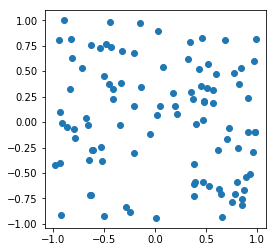

In [8]:
x = []
y = []
for i in range(100):
    xcoord,ycoord = B.random()
    x.append(xcoord)
    y.append(ycoord)

plt.plot(x, y, "o")
plt.gca().set_aspect(1)
plt.show()

Now we are ready to try to estimate an integral. Recall that we estimate the integral of $f$ over $B$ using $K$ uniformly distributed random elements of $B$ and computing 
$$\frac{Vol(B)}{K} \sum_{i=0}^{K-1} f(x^{(i)}).$$

Below we add a `integral_estimate` function to our class. We will use `f` for our function and `trials` for $K$ above.

In [9]:
class Box:
    def __init__(self, a, b):
        r"""
        Construct a box from two vectors a and b. These vectors must be of the same
        size and the entries of a must be smaller than those of b.
        """
        # Copy the a and b values, and make sure they are numpy arrays.
        self._a = np.array(a)
        self._b = np.array(b)
        
        # Check to see that a and b are vectors of the same shape:
        if self._a.shape != self._b.shape:
            raise ValueError("Vectors a and b need to have the same shape.")
        
        # Check that the coordinates of a are all smaller than the coordinates of b.
        if not (self._a < self._b).all():
            raise ValueError("The coordinates of the vector a need to be smaller than " +
                             "those of b.")
    
    def __repr__(self):
        return "Box({}, {})".format(repr(self._a), repr(self._b))

    def volume(self):
        """Return the volume of this box."""
        return np.prod(self._b - self._a)
    
    def random(self):
        """Return a uniformly random point in the box."""
        # To simplify notation:
        a = self._a
        b = self._b
        return (b-a)*np.random.random_sample(a.size) + a

    def integral_estimate(self, f, trials):
        """
        Estimate the integral of f over this box using Monte Carlo integration.
        
        The function `f` should be a real-valued function defined on vectors in the box.
        We estimate the integral by sampling vectors at random from the box. The number
        of vectors used is given by the integer `trials`.
        """
        # We compute the sum of f(x^(i)) where x^(i) is taken at random.
        # We'll store the result in total.
        total = 0
        for i in range(trials):
            total += f(self.random())
        
        # return the estimated integral:
        return self.volume() * total / trials


We will do a standard thing: Attempt to compute $\pi$. The number $\pi$ is the area of the unit circle. So, we can define
$$f(x,y) = \begin{cases}
1 & \text{if $x^2+y^2 \leq 1$} \\
0 & \text{otherwise.}
\end{cases}$$
Then if $B$ is the box used in our examples above, 
$$\pi = \int_B f~dA.$$
Thus we can approximate $\pi$ by choosing points at random from $B$ and computing 
$$\frac{Vol(B)}{K} \sum_{i=0}^{K-1} f(x^{(i)}).$$

To do this, we only need to code the function $f$. Note that the function takes as input a vector with two entries. The two coordinates of `v` can be accessed using `x,y = v`.

In [10]:
def f(v):
    x,y = v
    if x**2 + y**2 <= 1:
        return 1
    else:
        return 0

Here we approximate $\pi$ using 1000 points.

In [11]:
B =  Box([-1, -1], [1, 1])
B.integral_estimate(f, 1000)

3.2

Note that the algorithm is random, so the estimate will vary as we recompute.

In [12]:
B.integral_estimate(f, 1000)

3.104

To get a better estimate we can increase the number of points used:

In [13]:
B.integral_estimate(f, 100000)

3.12928

Below we compute the error as a function of the number of points, using powers of two for the number of points.

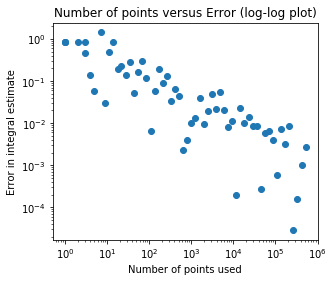

In [14]:
powers = [m.floor(1.25**k) for k in range(1,60)]
errors = []
for k in powers:
    error = abs( B.integral_estimate(f,k) - m.pi )
    errors.append(error)
plt.plot(powers, errors, "o")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Number of points used")
plt.ylabel("Error in integral estimate")
plt.title("Number of points versus Error (log-log plot)")
plt.gca().set_aspect(1)
plt.show()

In the log-log plot, you should see the error estimates clustering along a line of slope $-\frac{1}{2}$. This indicates that the error is on the order of a constant times $\frac{1}{\sqrt{K}}$ where $K$ is the number of points used. This is the typical form of the error estimate in any dimension.

Unfortunately this is a very slow improvement of the error. To get an extra digit of precision, we need to use 100 times as many sample points! Even using a million points as below only seems to give a few digits of accuracy.

In [15]:
B.integral_estimate(f, 10**6)

3.14126

## Vectorization

Vectorization is a computational technique to speed up repetitive computations. Numpy has vectorized methods that increase computational speed. I will demonstrate this and then give a heuristic explaination of why it works. 

Vectorization is discussed in **L** in &sect; 4.2.4 and in the context of Random Numbers and Games in &sect; 8.3.2 and later examples in chapter 8.

*Remark:* Vectorization is an advanced topic and will not be tested. However, it may be important in work in the real world. In this notebook, I notice a speed up of at least $100 \times$ when using vectorization.

For example if we let `x` be a random collection of 100,000 numbers. Then we can sum in three ways: 
 * Looping.
 * Use python's built in `sum` function.
 * Use numpy's `sum` function.

We'll use [`timeit`](https://docs.python.org/3/library/timeit.html) to time how long each method takes.

In [16]:
x = np.random.random_sample(100000)

To use `timeit` we find it convienient to write our two sum methods as functions:

In [17]:
def loop_sum():
    total = 0.0
    for value in x:
        total += value
    return total

def built_in_sum():
    return sum(x)

def np_sum():
    return np.sum(x)

In [18]:
import timeit

The following is the time (in seconds) it takes to run `loop_sum` 100 times.

In [19]:
loop_time = timeit.timeit(loop_sum, number=100)
loop_time

0.9095920210238546

Now `built_in_sum`.

In [20]:
built_in_time = timeit.timeit(built_in_sum, number=100)
built_in_time

0.8919960469938815

Note that the above two times are about the same.

Now we store the amount of time it takes to run `np_sum` 10 times.

In [21]:
np_sum_time = timeit.timeit(np_sum, number=100)
np_sum_time

0.005518718040548265

That took much less time. We can compute the speed up by taking the ratio:

In [22]:
loop_time / np_sum_time

164.81944073618408

The numpy method is over $100\times$ faster on my computer!

The reason for the speed increase is that numpy knows several things the other algorithms don't take advantage of:
* The things being added are (standard floating point) numbers.
* The numbers are stored in an organized way (since they are numpy arrays).

The numpy `sum` function takes advantage of hardware and software optimization made possible by knowing these facts to compute the sum quickly. The computations `numpy` carries out are done in pre-compiled and optimized `C` code, whereas the other two computations are carried out directly in Python, which slows things down. Essentially vectorization makes up for the [speed difference between Python and C](https://wiki.python.org/moin/Why%20is%20Python%20slower%20than%20the%20xxx%20language).

The built in `sum` function and the loop algorithm both work with more general data types, which is very useful if not fast. For example, the built in `sum` works with lists as demonstrated below.

In [23]:
sum([[i] for i in range(10)], [])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

We'd like to take advantage of this in our code. The first thing to do is to allow the `random` method to take a parameter `trials` giving number of random points to compute. We give the number of trials a default value of `None` to use the old behavior of returning just one point. Otherwise, we `trials` can be set to a positive integer. We'd like to return a matrix in this case with `trials` columns and a random point in the box in each column. After trial and error, we found the following command did this:
```python
((b-a)*np.random.random_sample((trials,)+a.shape) + a).transpose()
```

In the `integral_estimate` method, we will call the `random` method with the trials parameter. Then we make use of the `sum` function in `numpy` to add the images of the random points under our function `f`. Our function `f` must therefore be able to handle numpy arrays.

Below we have the vectorized version of the `Box` class.

In [24]:
class VectorizedBox:
    def __init__(self, a, b):
        r"""
        Construct a box from two vectors a and b. These vectors must be of the same
        size and the entries of a must be smaller than those of b.
        """
        # Copy the a and b values, and make sure they are numpy arrays.
        self._a = np.array(a)
        self._b = np.array(b)
        
        # Check to see that a and b are vectors of the same shape:
        if self._a.shape != self._b.shape:
            raise ValueError("Vectors a and b need to have the same shape.")
        
        # Check that the coordinates of a are all smaller than the coordinates of b.
        if not (self._a < self._b).all():
            raise ValueError("The coordinates of the vector a need to be smaller than " +
                             "those of b.")
    
    def __repr__(self):
        return "Box({}, {})".format(repr(self._a), repr(self._b))

    def volume(self):
        """Return the volume of this box."""
        return np.prod(self._b - self._a)
    
    def random(self, trials =  None):
        """
        By default trials is None and we return a uniformly random point in the box.
        
        Otherwise trials should be a positive integer. We return a matrix with the 
        number of columns equal to trials. Each column is a point in the box chosen
        uniformly at random.
        """
        # To simplify notation:
        a = self._a
        b = self._b
        if trials is None:
            # Default handling
            return (b-a)*np.random.random_sample(a.size) + a
        else:
            # Handling if using multiple trials.
            return ((b-a)*np.random.random_sample((trials,)+a.shape) + a).transpose()

    def integral_estimate(self, f, trials):
        """
        Estimate the integral of f over this box using Monte Carlo integration.
        
        The function `f` should be a real-valued function defined on vectors in the box.
        We estimate the integral by sampling vectors at random from the box. The number
        of vectors used is given by the integer `trials`.
        
        The function `f` allow numpy arrays (matrices) as input for multiple trials 
        (with each trial a column of the matrix).
        """
        # We compute the sum of f(x^(i)) where x^(i) is taken at random.
        # We'll store the result in total.
        total = np.sum(f(self.random(trials)))
        # return the estimated integral:
        return self.volume() * total / trials

Our usual box in the plane:

In [25]:
B =  VectorizedBox([-1, -1], [1, 1])

Here we check that the `random` method of `VectorizedBox` works as expected.

In [26]:
B.random()

array([0.59881336, 0.41775306])

In [27]:
v = B.random(5)
v

array([[-0.21416903, -0.87180757,  0.0078377 , -0.18763971, -0.11024967],
       [-0.20580511,  0.66991187, -0.35497872,  0.95677071,  0.4738001 ]])

Note that each column is a random point in the box. This is what we wanted.

Now we vectorize our function $f$. Note that it will return `True` or `False`.

In [28]:
def vectorized_f(v):
    x,y = v
    return x**2 + y**2 <= 1

In [29]:
vectorized_f(v)

array([ True, False,  True,  True,  True])

In Python, when you use True and False in numerical expressions `True` is $1$ and `False` is $0$. So, we can find the number of trues with:

In [30]:
np.sum(vectorized_f(v))

4

Our integral approximation should be working then. Here we try with a million trials. It runs much faster.

In [31]:
B.integral_estimate(vectorized_f, 10**6)

3.139592

We will use `timeit` to compare the original method with the vectorized version.

In [32]:
def original_computation():
    B = Box([-1, -1], [1, 1])
    return B.integral_estimate(f, 10**6)

def vectorized_computation():
    B = VectorizedBox([-1, -1], [1, 1])
    return B.integral_estimate(vectorized_f, 10**6)

In [33]:
t1 = timeit.timeit(original_computation, number=1)
t1

5.060465669957921

In [34]:
t2 = timeit.timeit(vectorized_computation, number=1)
t2

0.04013419500552118

In [35]:
t1/t2

126.08863013850815

This version is about a 100 times faster. We extend our error graph from above:

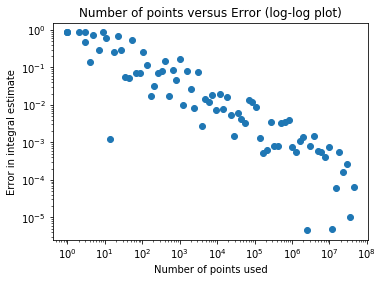

In [36]:
B =  VectorizedBox([-1, -1], [1, 1])
powers = [m.floor(1.25**k) for k in range(1,80)]
errors = []
for k in powers:
    error = abs( B.integral_estimate(vectorized_f,k) - m.pi )
    errors.append(error)
plt.plot(powers, errors, "o")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Number of points used")
plt.ylabel("Error in integral estimate")
plt.title("Number of points versus Error (log-log plot)")
plt.gca().set_aspect(1)
plt.show()

## Example: Volume of a torus

Let $C$ be the unit circle in the $xy$-plane centered at the origin and of radius $2$. Let $T$ be the three dimensional region consisting of points whose distance from $C$ is less than one. We will estimate the volume of $T$, which is a solid torus.

Here $R=2$ is the major radius and $r=1$ is the minor radius. The volume of a torus of this form has the formula 
$$V=2 \pi^2 r^2 R.$$
See for example, the [discussion on Wikipedia](https://en.wikipedia.org/wiki/Torus#Geometry).

In [37]:
actual_volume = 2*np.pi**2*2
actual_volume

39.47841760435743

Before computing the volume, we will plot it to get a sense of what $T$ looks like.

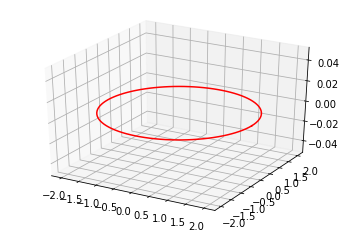

In [38]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
theta = np.linspace(0, 2*np.pi, 100)
ax.plot(2*np.cos(theta), 2*np.sin(theta),0, "r")

The distance from a point to a smooth curve can be realized by a line segment between the point and the curve which is orthogonal to the curve. (This is essentially the principle behind Lagrange multipliers.) A point $(x,y,0)$ on $C$ determines a plane orthogonal to $C$ at $(x,y,0)$: the span of the unit orthogonal vectors $\frac{1}{2} (x,y,0)$ and $(0,0,1)$. Thus the points $(x',y',z')$ that have unit distance from $(x,y,0)$ and so that the line segment from  $(x',y',z')$ to $(x,y,0)$ is perpendicular to $C$ have the form:
$$(x',y',z') =  (x,y,0) + \frac{\cos \phi}{2} (x,y,0) + \sin \phi(0,0,1)$$
for some angle $\phi$. This means that we can parameterize the boundary of $T$ using
$$(x',y',z') =  (1+\frac{\cos \phi}{2}) (2 \cos \theta,2\sin \theta,0) + \sin \phi(0,0,1)$$
or
$$(x',y',z') =  \left((2+\cos \phi)\cos \theta, (2+\cos \phi)\sin \theta, \sin \phi\right).$$

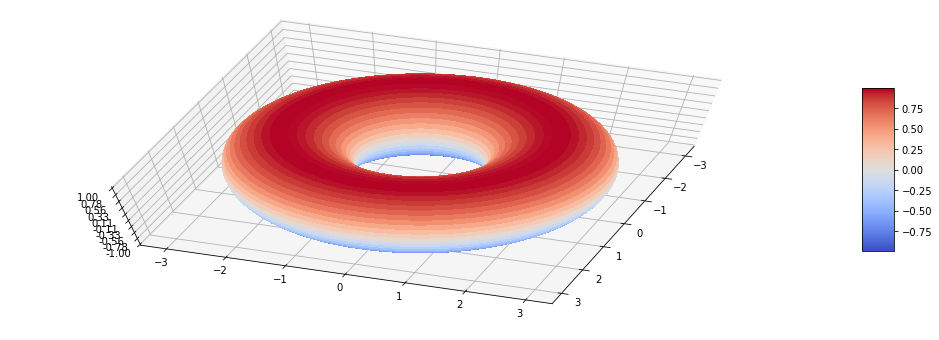

In [39]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(figsize=plt.figaspect(0.333)*1.5)
ax = fig.gca(projection='3d')
ax.view_init(70,20)

# Make data.
theta = np.linspace(0, 2*np.pi, 100)
phi = np.linspace(0, 2*np.pi, 100)
theta, phi = np.meshgrid(theta, phi)
X = (2+np.cos(phi))*np.cos(theta)
Y = (2+np.cos(phi))*np.sin(theta)
Z = np.sin(phi)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.0, 1.0)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

To find the volume of the region, by 3D Monte Carlo Integration we need a function that returns True for points in the torus and False for points outside the torus. The closest point on the circle $C$ to $(x,y,z)$ is 
$$\left(\frac{2x}{\sqrt{x^2+y^2}}, \frac{2y}{\sqrt{x^2+y^2}},0\right)$$
unless $x=y=0$ in which case all points on the circle are equally distant. So, we can check if the distanct from $C$ is less than one by computing the distance from $(x,y,z)$ to the above point. This is 
$$\sqrt{\left(x - \frac{2x}{\sqrt{x^2+y^2}}\right)^2 + \left(y - \frac{2y}{\sqrt{x^2+y^2}}\right)^2 + z^2}.$$
We can just check if the square of this distance is less than one.

In [40]:
def inside_torus(v):
    x,y,z = v
    dist_from_z_axis = np.sqrt(x**2 + y**2)
    return (x-2*x/dist_from_z_axis)**2 + \
           (y-2*y/dist_from_z_axis)**2 + z**2 <= 1

With this function, we can try to compute the volume.

In [41]:
box = VectorizedBox((-3,-3,-1), (3,3,1))

We use ten million sample points:

In [42]:
volume_estimate = box.integral_estimate(inside_torus, 10**7)
volume_estimate

39.4777296

Below we indicate the absolute error:

In [43]:
error = abs(volume_estimate - actual_volume)
error

0.00068800435742844

It is also possible to compute the volume as a 2D integral. We'd express the volume of $T$ as an integral of the form
$$Vol(T) = \int_{-3}^3 \int_{-3}^3 f(x,y)~dy~dx.$$
Here $f(x,y)$ would be the function which is zero if $(x,y,0)$ lies outside the torus and would be the length of the line segment joining $(x,y,z)$ to $(x,y,-z)$ where $(x,y,z)$ is a point in the boundary of $T$. The closest point on $C$ to all of these points on the line segment is again 
$$\left(\frac{2x}{\sqrt{x^2+y^2}}, \frac{2y}{\sqrt{x^2+y^2}},0\right)$$
Our $z$ is the positive real number so that 
$$1 = \sqrt{\left(x - \frac{2x}{\sqrt{x^2+y^2}}\right)^2 + \left(y - \frac{2y}{\sqrt{x^2+y^2}}\right)^2 + z^2}.$$\
Solving for $z^2$ we see that 
$$z^2 = 1 - \left(x - \frac{2x}{\sqrt{x^2+y^2}}\right)^2 - \left(y - \frac{2y}{\sqrt{x^2+y^2}}\right)^2.$$
If this number is negative then $(x,y,0)$ will not be in $T$. Thus, we have
$$f(x,y) = 2\sqrt{\max\left(0, 1 - \left(x - \frac{2x}{\sqrt{x^2+y^2}}\right)^2 - \left(y - \frac{2y}{\sqrt{x^2+y^2}}\right)^2\right)}.$$

To code this we discovered the `maximum` function in numpy which differs from the `max` function. The `maximum` function returns the maximum of two values, while `max` returns the maximum over an array.

In [44]:
def f(v):
    x,y = v
    dist_from_z_axis = np.sqrt(x**2 + y**2)
    return 2*np.sqrt(np.maximum(0.,
        1.0 - (x-2*x/dist_from_z_axis)**2 - (y-2*y/dist_from_z_axis)**2))

Here we create our 2D box.

In [45]:
box = VectorizedBox((-3,-3), (3,3))

Now we estimate the volume using 10 million sample points.

In [46]:
volume_estimate = box.integral_estimate(f, 10**7)
volume_estimate

39.48084506392184

In [47]:
error = abs(volume_estimate - actual_volume)
error

0.002427459564408707